In [ ]:
import pandas as pd
import numpy as np

file_path = 'BostonHousing.csv'  # Update this if your file path is different
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

# Display information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [ ]:
data = data.dropna()


In [ ]:
# Initial linear regression with all parameters
X_all = data.drop(columns=['medv'])
y_all = data['medv']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_all = LinearRegression()

# Train the model
model_all.fit(X_train_all, y_train_all)


LinearRegression()

In [ ]:
y_pred_all = model_all.predict(X_test_all)

In [ ]:
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test_all, y_pred_all)

print(f"All Parameters - Mean Squared Error: {mse_all}")
print(f"All Parameters - Root Mean Squared Error: {rmse_all}")
print(f"All Parameters - R-squared: {r2_all}")

All Parameters - Mean Squared Error: 20.687720473048476
All Parameters - Root Mean Squared Error: 4.548375586189917
All Parameters - R-squared: 0.7200277678580317


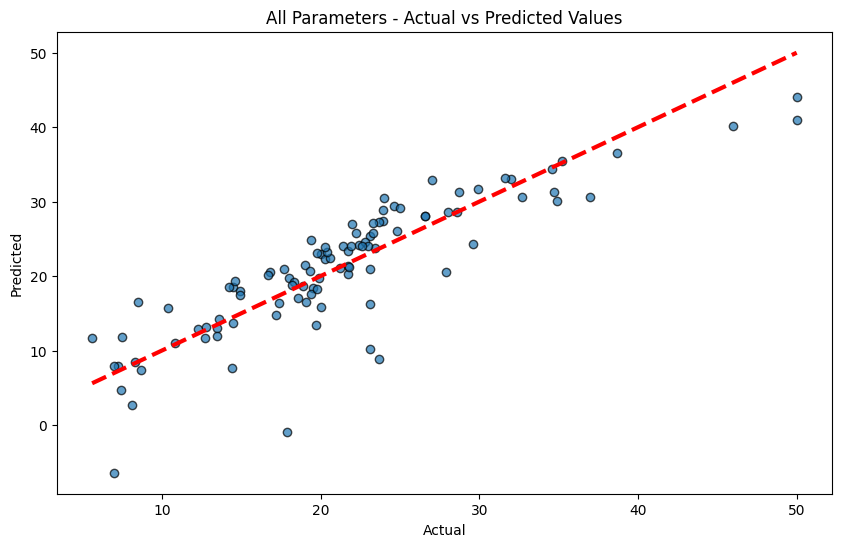

In [ ]:
# Plotting actual vs predicted values for all parameters
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_all, edgecolor='k', alpha=0.7)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('All Parameters - Actual vs Predicted Values')
plt.show()

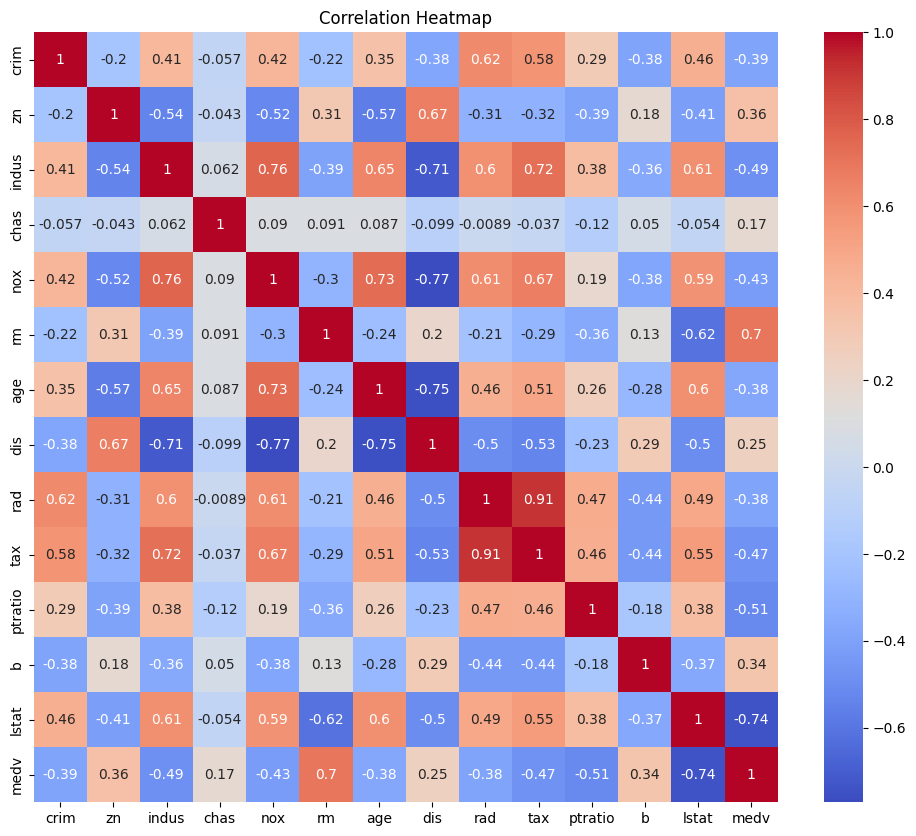

In [ ]:
# Draw a heatmap of correlations
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
relevant_features = corr_matrix.index[abs(corr_matrix["medv"]) > 0.5].tolist()
relevant_features.remove('medv')
print("Selected relevant features:", relevant_features)


Selected relevant features: ['rm', 'ptratio', 'lstat']


In [ ]:
# Linear regression with selected parameters
X_relevant = data[relevant_features]
y_relevant = data['medv']

In [ ]:
# Split the data into training and testing sets
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(X_relevant, y_relevant, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_rel = LinearRegression()

# Train the model
model_rel.fit(X_train_rel, y_train_rel)


LinearRegression()

In [ ]:
y_pred_rel = model_rel.predict(X_test_rel)


In [ ]:
# Evaluate the model
mse_rel = mean_squared_error(y_test_rel, y_pred_rel)
rmse_rel = np.sqrt(mse_rel)
r2_rel = r2_score(y_test_rel, y_pred_rel)

print(f"Selected Parameters - Mean Squared Error: {mse_rel}")
print(f"Selected Parameters - Root Mean Squared Error: {rmse_rel}")
print(f"Selected Parameters - R-squared: {r2_rel}")


Selected Parameters - Mean Squared Error: 24.601921143326106
Selected Parameters - Root Mean Squared Error: 4.960032373213516
Selected Parameters - R-squared: 0.6670558853281565


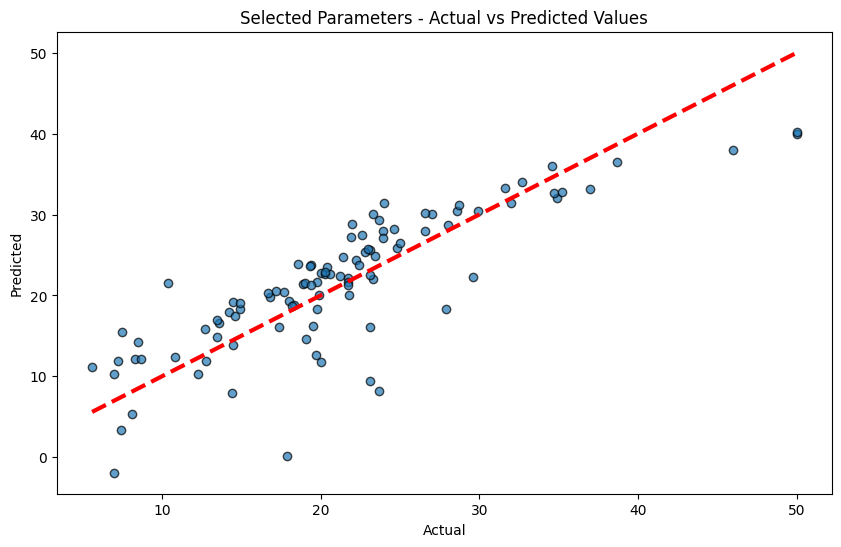

In [ ]:
# Plotting actual vs predicted values for selected parameters
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rel, y_pred_rel, edgecolor='k', alpha=0.7)
plt.plot([y_test_rel.min(), y_test_rel.max()], [y_test_rel.min(), y_test_rel.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Selected Parameters - Actual vs Predicted Values')
plt.show()

In [ ]:
# Compare results
print("\nComparison:")
print(f"All Parameters - RMSE: {rmse_all}, R-squared: {r2_all}")
print(f"Selected Parameters - RMSE: {rmse_rel}, R-squared: {r2_rel}")


Comparison:
All Parameters - RMSE: 4.548375586189917, R-squared: 0.7200277678580317
Selected Parameters - RMSE: 4.960032373213516, R-squared: 0.6670558853281565
